In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import datasets

from src.data import load_qtimelines, load_timeset

/home/ubuntu/projects/temporal_game/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Question Timeline    

In [2]:
trainset = load_qtimelines("train")
validset = load_qtimelines("valid")
testset = load_qtimelines("test")

Saving the dataset (1/1 shards): 100%|██████████| 3676/3676 [00:00<00:00, 71954.81 examples/s] 


### Train Labels Distribution

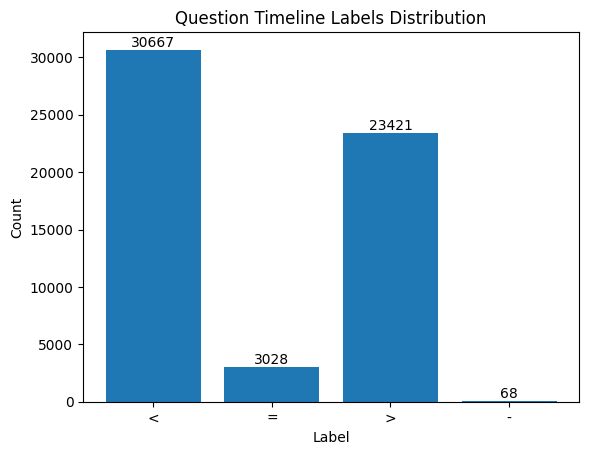

In [3]:
train_labels = trainset["label"]
train_labels_counter = Counter(train_labels)

plt.bar(train_labels_counter.keys(), train_labels_counter.values())
for i, v in enumerate(train_labels_counter.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Question Timeline Labels Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Valid Labels Distribution

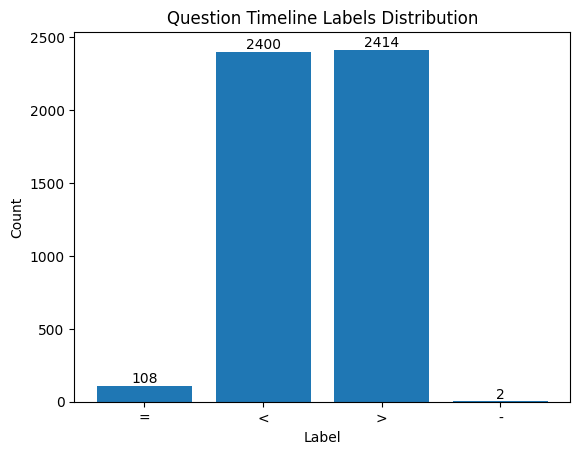

In [4]:
valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

plt.bar(
    valid_labels_counter.keys(), valid_labels_counter.values()
)  # add number to the bars
for i, v in enumerate(valid_labels_counter.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Question Timeline Labels Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Test Labels Distribution

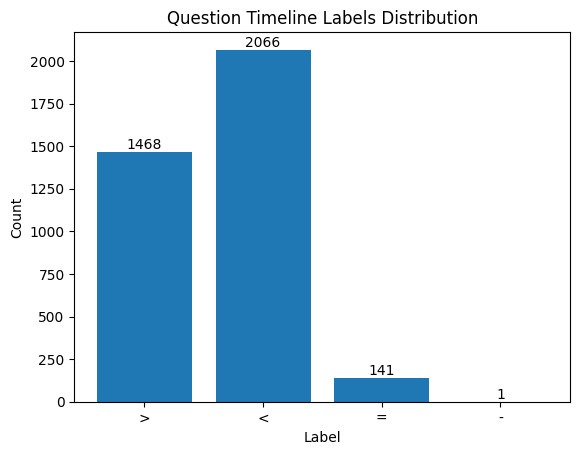

In [5]:
test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

plt.bar(test_labels_counter.keys(), test_labels_counter.values())
for i, v in enumerate(test_labels_counter.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Question Timeline Labels Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Example Questions

In [6]:
print("Question:\n", trainset[0]["text"])
print("Answer:\n", trainset[0]["label"])

Question:
 Context:
Documents Creation Time: <t92>10/27/89</t92> AMI Z.CSU WNEWS TENDER OFFERS, MERGERS, ACQUISITIONS (TNM) HEALTH CARE PROVIDERS, MEDICINE, DENTISTRY (HEA) LOS ANGELES IMA Holdings Corp. <ei386>completed</ei386> its $3 billion acquisition of American Medical International Inc., purchasing 63 million shares, or 86%, of the Los Angeles-based health-care services concern for $26.50 a share.

Question:
What is the temporal relation between the start <ei386>completed</ei386> and the start <t92>10/27/89</t92>?

Options:
<, in case the start <ei386>completed</ei386> happens before the start <t92>10/27/89</t92>
>, in case the start <ei386>completed</ei386> happens after the start <t92>10/27/89</t92>
=, in case the start <ei386>completed</ei386> happens the same time as the start <t92>10/27/89</t92>
-, in case the start <ei386>completed</ei386> happens not related to the start <t92>10/27/89</t92>

Answer:

Answer:
 <


## Timeset

In [7]:
testset = load_timeset("test")
validset = load_timeset("valid")

### Test Labels Distribution

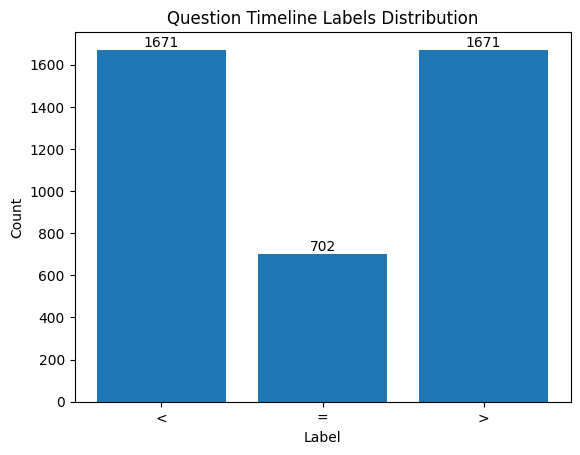

In [8]:
test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

plt.bar(test_labels_counter.keys(), test_labels_counter.values())
for i, v in enumerate(test_labels_counter.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Question Timeline Labels Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Valid Labels Distribution

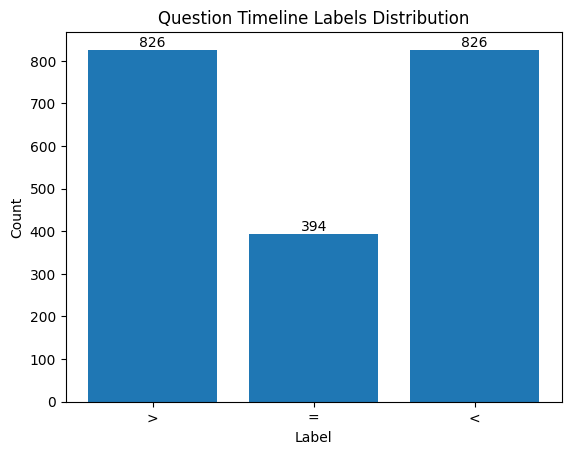

In [9]:
valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

plt.bar(
    valid_labels_counter.keys(), valid_labels_counter.values()
)  # add number to the bars
for i, v in enumerate(valid_labels_counter.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Question Timeline Labels Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Example Questions

In [10]:
print("Question:\n", testset[0]["text"])
print("Answer:\n", testset[0]["label"])

Question:
 Twelve-year journey of Rosetta ends; spacecraft crashes into comet
Monday, October 3, 2016 
On Friday, European Space Agency's (ESA) spacecraft Rosetta ended its mission, <start_source>crashing</start_source> into Jupiter-family comet 67P/Churyumov–Gerasimenko. Rosetta is the first spacecraft to orbit a comet; it traveled in space for twelve years and about eight billion kilometres (about five billion miles).
The ESA's Darmstadt, Germany control centre <start_target>ceased</start_target> to receive signals from the spacecraft, confirming the Rosetta mission's end, at 11:19 UTC. Mission controllers said it was traveling about 90 centimeters per second on impact (two miles per hour), about a walking pace.
Almost two years ago, in November 2014, Rosetta successfully landed a probe called Philae onto 67P/Churyumov–Gerasimenko, with amongst its goals better understanding how the Solar System was formed. Philae's discoveries included the presence of molecular oxygen and nitrogen o

## Temporal Questions


In [11]:
trainset = datasets.load_dataset("hugosousa/TemporalQuestions", split="train")
validset = datasets.load_dataset("hugosousa/TemporalQuestions", split="valid")
testset = datasets.load_dataset("hugosousa/TemporalQuestions", split="test")

### Test Labels Distribution

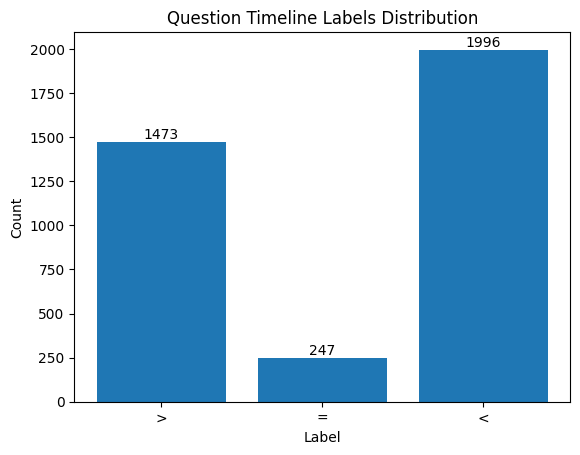

In [12]:
test_labels = testset["label"]
test_labels_counter = Counter(test_labels)

plt.bar(test_labels_counter.keys(), test_labels_counter.values())
for i, v in enumerate(test_labels_counter.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Question Timeline Labels Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Valid Labels Distribution

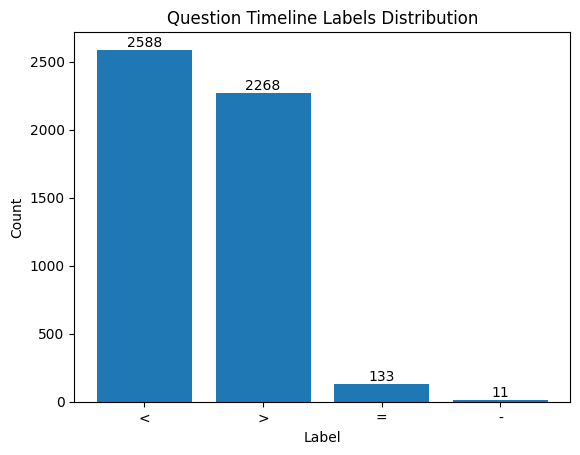

In [13]:
valid_labels = validset["label"]
valid_labels_counter = Counter(valid_labels)

plt.bar(
    valid_labels_counter.keys(), valid_labels_counter.values()
)  # add number to the bars
for i, v in enumerate(valid_labels_counter.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Question Timeline Labels Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Train Labels Distribution

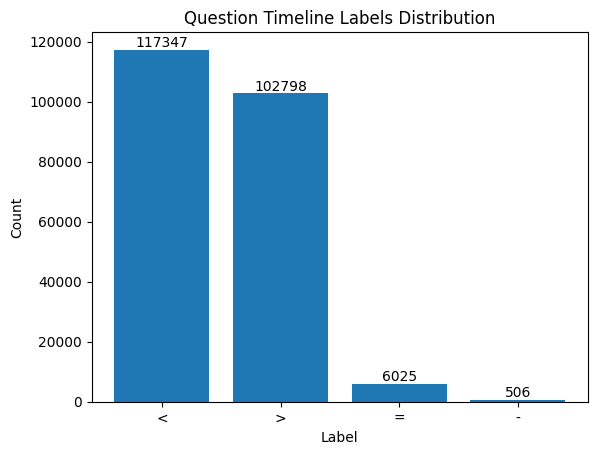

In [14]:
train_labels = trainset["label"]
train_labels_counter = Counter(train_labels)

plt.bar(
    train_labels_counter.keys(), train_labels_counter.values()
)  # add number to the bars
for i, v in enumerate(train_labels_counter.values()):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Question Timeline Labels Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

### Example

In [15]:
print("Text:\n", testset[0]["text"])
print("Label:\n", testset[0]["label"])

Text:
 Mr. Netanyahu's office <end_target>confirmed</end_target> that the Israeli leader, in a conversation with Mr. Erdogan, "agreed to restore normalization between Israel and Turkey, including the <start_source>dispatch</start_source> of ambassadors and the cancellation of legal steps against [Israeli Defense Forces] soldiers."
Label:
 >


In [16]:
testset[0]["text"]

'Mr. Netanyahu\'s office <end_target>confirmed</end_target> that the Israeli leader, in a conversation with Mr. Erdogan, "agreed to restore normalization between Israel and Turkey, including the <start_source>dispatch</start_source> of ambassadors and the cancellation of legal steps against [Israeli Defense Forces] soldiers."'

In [17]:
#### Check Contexts are Unique

In [18]:
print("Trainset length:", len(trainset["text"]))
print("Trainset unique length:", len(set(trainset["text"])))

print("Validset length:", len(validset["text"]))
print("Validset unique length:", len(set(validset["text"])))

print("Testset length:", len(testset["text"]))
print("Testset unique length:", len(set(testset["text"])))

Trainset length: 226676
Trainset unique length: 226676
Validset length: 5000
Validset unique length: 5000
Testset length: 3716
Testset unique length: 3712


Check the number of tokens.

In [19]:
from transformers import AutoTokenizer

In [20]:
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM2-135M")

In [26]:
trainset = trainset.map(lambda x: {"n_tokens": len(tokenizer(x["text"]).input_ids)})
validset = validset.map(lambda x: {"n_tokens": len(tokenizer(x["text"]).input_ids)})
testset = testset.map(lambda x: {"n_tokens": len(tokenizer(x["text"]).input_ids)})

Map:   0%|          | 0/226676 [00:00<?, ? examples/s]

Map: 100%|██████████| 226676/226676 [01:20<00:00, 2813.64 examples/s]


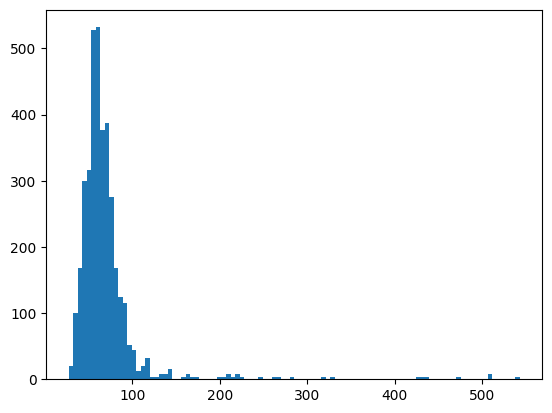

In [31]:
plt.hist(testset["n_tokens"], bins=100)
plt.show()